## Different Approaches to Multi Objective Optimization

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sys

In [2]:
# Global Variables  
r = []
w = [6,6,8,7]
v = [1,2,3,2]
alpha = [1, 2.3, 0.3, 2.3]
beta = [1.5, 1.5, 1.5, 1.5]
C = 400
V = 250
W = 500

In [3]:
# Constraint Handling

def constraint_handling(x, number_of_variables):
    
    global r
    
    g1, g2, g3 =0,0,0
    for j in range(number_of_variables):
        g1 += ((alpha[j]*pow(10,-5))*(-1000/np.log(r[j]))**beta[j])*(x[j] + np.exp(x[j]/4))
        g2 += v[j]*(x[j])**2
        g3 += w[j]*(x[j] + m.exp(x[j]/4))
        
            
    if g1 <= C and g2 <= V and g3 <= W:
        return 1
    else:
        return 0

In [4]:
# Creation of the initial population
def Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound):
    global r
    pseudo_list = []
    rt = np.random.uniform(0.5, 1, size = number_of_variables)
    pseudo_list.append(rt)
    population = np.zeros((population_size, number_of_variables))
    
    z, r_no, = 0,1
    
    if len(r) == 0:
        while True:
            g1, g2, g3 =0,0,0
            z += 1
            x = np.random.randint(variable_lower_bound, variable_upper_bound, size=number_of_variables)
            for j in range(number_of_variables):
                g1 += ((alpha[j]*pow(10,-5))*(-1000/m.log(rt[j]))**beta[j])*(x[j] + m.exp(x[j]/4))
                g2 += v[j]*(x[j])**2
                g3 += w[j]*(x[j] + m.exp(x[j]/4))
            
        
            
            
            if g1 <= C and g2 <= V and g3 <= W:
                r = rt
                print(f"r: {r}")
                break
            elif z > 10000:
                r_no += 1
                print(f"Changing Value of R for {r_no}th time")
                while True:
                    rt = np.random.uniform(0.5, 1, size=number_of_variables)
                    # Check if the array r is in pseudo_list
                    if not any(np.array_equal(r, arr) for arr in pseudo_list):
                        break
                pseudo_list.append(r)
                if r_no > 10000:
                    print("Unable to find a feasible solution after 20000 iterations")
                    exit(0)
                
                z = 0
            # clear_output(wait=True)
            # gc.collect()
            #print(f"Least value of G1 is = {g11}, G2 is = {g22}, G3 is = {g33}")
        
    for i in range(population_size):
        while True:
            x = np.random.randint(variable_lower_bound, variable_upper_bound, size=number_of_variables)
            value = constraint_handling(x, number_of_variables)
            if value == 1:
                break
        
        
        population[i, :] = x


    return population  # [[X1, X2, X3, ..... , Xn]]

In [5]:
# Function calculation of population
def Function_values_2(population):

    values = []
    #print(f"Value of r in Function_values_2: {r}")
    for i,x in enumerate(population):
        f1,f2 = 1,0
        for j in range(len(r)):
            
            f1 *= (1 - (1 - r[j])**x[j])
            f2 += ((alpha[j]*pow(10,-5))*(-1000/m.log(r[j]))**beta[j])*(x[j] + m.exp(x[j]/4))
            
        values.append([f1,f2])
    
    #print(values)

    return values   # [F1, F2]

In [6]:
# Fitness calculation of the Function Values
# Finding the Pareto Optimal solutions

def Non_dominated_sorting_fitness_calculation_2(function_values):
    
    pareto_optimal_fronts = [] # Contains the list of final function values all the fronts
    domination = {} # Contains the index as Key and the dominates Indexes and How many are dominating
                    # {"Index of the Function Value": [["dominating index"], No of solutions dominates by]}
    front = []      # Contains fronts Indexes
    front1 = [] # Contains the Index of the Solutions of the first front
    for i, x in enumerate(function_values):
        sp = []     # Contains the list of Solutions that the current value is Dominating
        np = 0      # Contains the number of solutions that are Dominating the current solution 
        for j, y in enumerate(function_values):
            if x[0] > y[0] and x[1] < y[1]: # Since Maximization Criteria of F1 and Minimization Criteria of F2
                sp.append(j)
            elif x[0] < y[0] and x[1] > y[1]:
                np += 1
        
        domination[i] = [sp, np]
        
        if np == 0:
            front1.append(i)
    front.append(front1)
    
    
    i = 0
    while len(front[i]) > 0:
        temp = []
        for individual in front[i]:
            for other_individual in domination[individual][0]:
                domination[other_individual][1] -= 1
                if domination[other_individual][1] == 0:
                    temp.append(other_individual)
        i += 1
        front.append(temp) # Entering the Values in the Next
    
    for i  in range(len(front)):
        _ = []
        for individual in front[i]:
            _.append(function_values[individual]) # Converting Index Values to Function
        
        pareto_optimal_fronts.append(_)
    
    return pareto_optimal_fronts    # [[[F1, F2], [F1,F2],..]-> Front1, [[F1,F2], [F1,F2],....]-> Front2, ...]

In [7]:
# Function to Create a good Diversity between the solutions

def Crowding_distance_calculation(pareto_optimal_fronts):
    
    max_int = sys.maxsize
    
    distances_values = []
    
    for front in pareto_optimal_fronts: 
                                        # front contains [[F1, F2], [F1, F2], [F1, F2],... ]
        dis = []
        sorted_front = sorted(front, key=lambda l:l[0]) # Sorting the Fronts based in function F1
        
        dis.append(max_int)   # Giving the Extreme point a Maximum Value
        
        if len(sorted_front) > 1:
            for i in range(1, len(sorted_front) - 1):
                
                val = (abs(sorted_front[i+1][0] - sorted_front[i-1][0]))/(max(sorted_front[0]) - min(sorted_front[0]))
                
                dis.append(val)
            
            dis.append(max_int)   # Giving the Extreme point a Maximum Value
            
        
            sorted_front = sorted(front, key=lambda l:l[1]) # Sorting the Fronts based in function F2
                
            dis[0] = max_int
                        
            for i in range(1, len(sorted_front) - 1):
                    
                val = (abs(sorted_front[i+1][1] - sorted_front[i-1][1]))/(max(sorted_front[1]) - min(sorted_front[1]))
                    
                dis[i] += val
                
            dis[len(sorted_front)-1] = max_int
        
        distances_values.append(dis)
        
    return distances_values  # [[D1, D2, D3,..]-> Front1, [D1, D2, D3,...]-> Front2, ...]

Different Selection Operations

In [8]:
def Elitism_Selection(function_values, pareto_optimal_fronts, distance_values, population_size, population):
    # Initialize lists for holding selected individuals
    selected_list = []  # ["Function_value_index", "pareto_optimal_front_number", "crowding_distance_value"]
    final_selected_list = []  # ["Population Values"] that is the new population after calculation and selection 

    # Create a list of tuples (function_value_index, pareto_optimal_front_number, crowding_distance_value)
    for i, x in enumerate(function_values):
        _ = [] # ["Function_value_Index", "Pareto_optimal_Front_Position", "crowding_distance_value"]
        for j, y in enumerate(pareto_optimal_fronts):
            for k, z in enumerate(y):
                if x == z:
                    _.append(i)
                    _.append(j)
                    _.append(distance_values[j][k])

        selected_list.append(_)
    # Sort the selected list first by Pareto front number (ascending), then by crowding distance (descending)
    selected_list.sort(key=lambda x: (x[1], -x[2]))

    # # Select the top `population_size` individuals
    for i in range(population_size):
        population_value = population[selected_list[i][0]]
        final_selected_list.append(population_value)  # the final population values that is of X1, x2. ..
        
    
    # Select the top `population_size` individuals
    # for i in range(population_size//2):
    #     population_value = population[selected_list[i][0]]
    #     for j in range(2):
    #         final_selected_list.append(population_value)  # the final population values that is of X1, x2. ..

    return final_selected_list  # [[X1,X2,..], [X1,X2,..], [X1,X2,..],..]


Different Cross-Overs 

In [9]:
# Cross - Over Function

def sbx_Crossover(population, eta_c=10, lows=None, highs=None): # Using SBX cross-over method
    
    offspring = []
    
    for i in range(0,len(population)):
        
        parent1 = population[i]
        
        if i+1 > len(population)-1:
            parent2 = population[0]
        else:
            parent2 = population[i+1]
        
        child1 = np.zeros_like(parent1)
        child2 = np.zeros_like(parent2)
        
        
        for j in range(len(parent1)):
            low = lows[j]
            high = highs[j]
            u = rnd.random()
            if u <= 0.5:
                beta = (2 * u) ** (1 / (eta_c + 1))
            else:
                beta = (1 / (2 * (1 - u))) ** (1 / (eta_c + 1))
            
            child1[j] = 0.5 * (((1 + beta) * parent1[j]) + ((1 - beta) * parent2[j]))
            child2[j] = 0.5 * (((1 - beta) * parent1[j]) + ((1 + beta) * parent2[j]))
            
            child1[j] = max(low, min(child1[j], high))
            child2[j] = max(low, min(child2[j], high))
        
        check = constraint_handling(child1, len(parent1))
        if check != 1:
            child1 = parent1
        
        check = constraint_handling(child2, len(parent2))
        if check != 1:
            child2 = parent2
        
        offspring.append(child1)
        offspring.append(child2)
        
        i += 2
    
    return offspring

Different Mutations

In [10]:
# Mutation Function
def polynomial_Mutation(population, pm=0.4, eta_m=20, lows= None, highs=None):  # Polynomial Mutation
    mutated_individual = np.copy(population)
    
    for i in range(len(population)):
        if rnd.random() < pm:
            for j in range(len(lows)):
                low = lows[j] if lows else None
                high = highs[j] if highs else None
                u = rnd.random()
                delta = min(mutated_individual[i][j] - low, high - mutated_individual[i][j])
                delta_q = (2 * u) ** (1 / (eta_m + 1)) - 1 if np.random.random() < 0.5 else 1 - (2 * (1 - u)) ** (1 / (eta_m + 1))
                mutated_individual[i][j] += delta * delta_q
                
                mutated_individual[i][j] = max(low, min(mutated_individual[i][j], high))
        
        check = constraint_handling(mutated_individual[i], len(mutated_individual[i]))
        if check != 1:
            mutated_individual[i] = population[i] # If constraint is violated, revert back to the original individual.
    
    return mutated_individual

In [11]:
# Function to generate the new Generation of better solutions
def New_generations_Elitism_Selection(Parent_population, Offspring_population):
    
    combination_of_generations = [] # List containing the combination of both parent and child population
    next_generation_values = [] # List containing the values of the next/new generations
    
    
    for i in range(len(Parent_population)):
        combination_of_generations.append(Parent_population[i])
        combination_of_generations.append(Offspring_population[i])
    
    # List containing the function values
    function_values = Function_values_2(combination_of_generations)
    # list containing pareto optimal fronts
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    # List containing the Crowding distance
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    # List containing the final selected values
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                len(combination_of_generations), combination_of_generations)
    
    for i in range(len(Parent_population)):
        next_generation_values.append(final_selected_values[i])
    
    return next_generation_values

Threshold = 800.0
Changing Value of R for 2th time
r: [0.70683116 0.90305411 0.51314359 0.86047302]
GENERATION :- 1


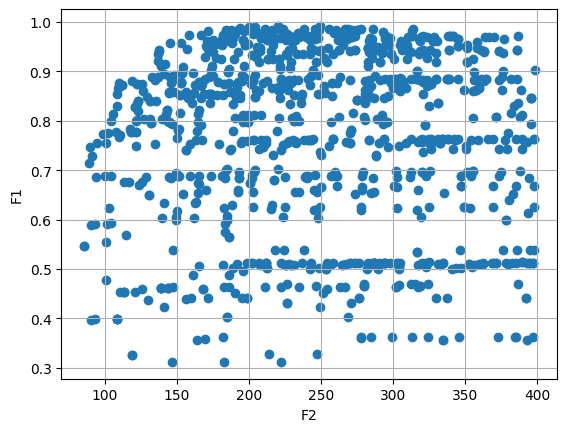

GENERATION :- 2


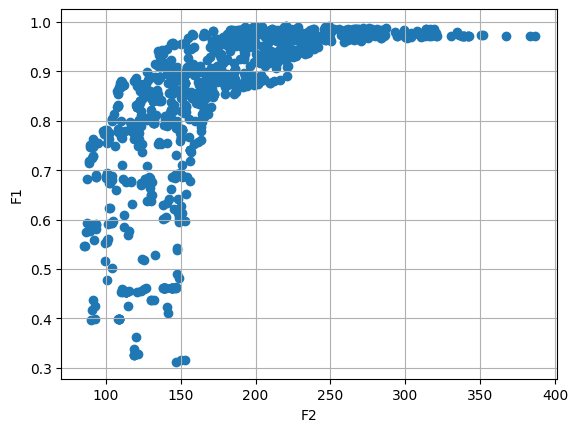

GENERATION :- 3


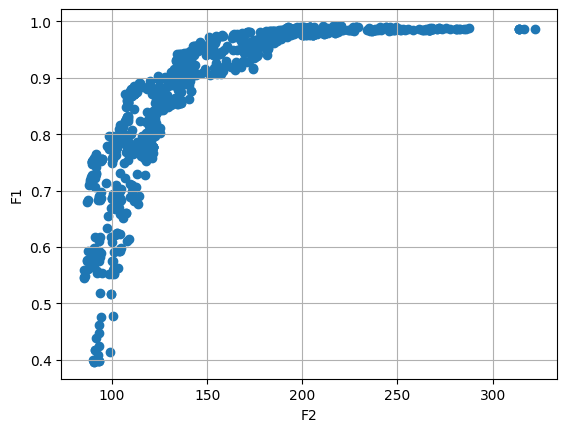

GENERATION :- 4


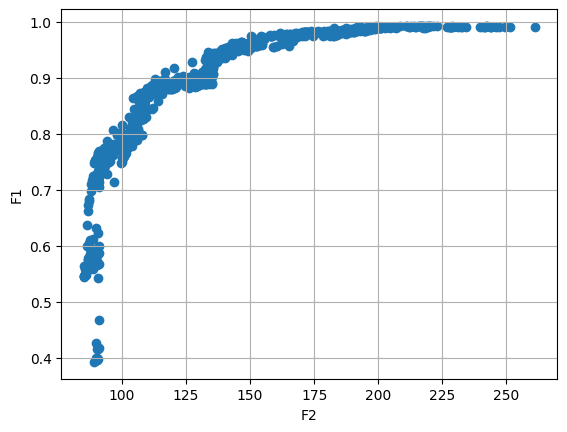

GENERATION :- 5


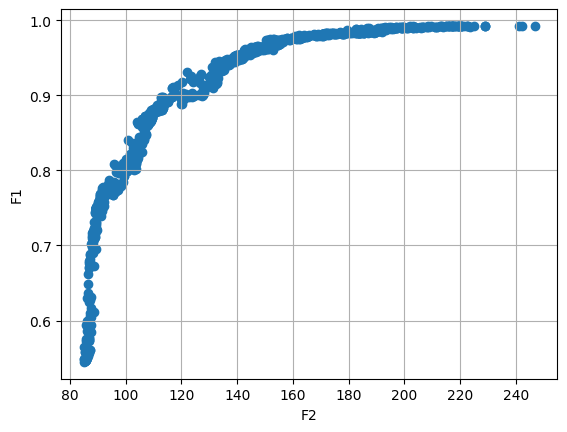

GENERATION :- 6


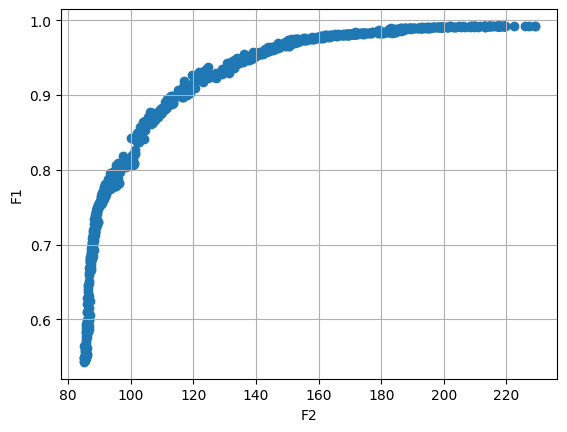

GENERATION :- 7


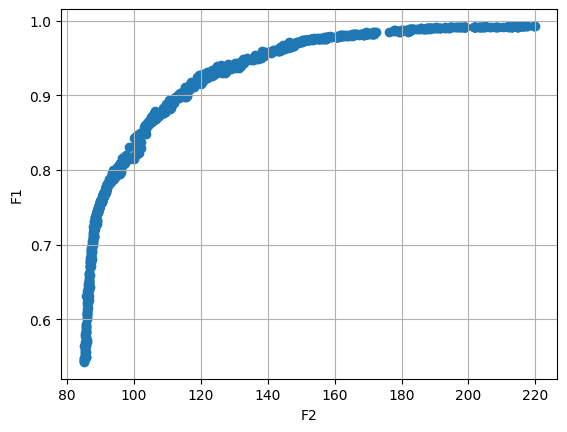

GENERATION :- 8


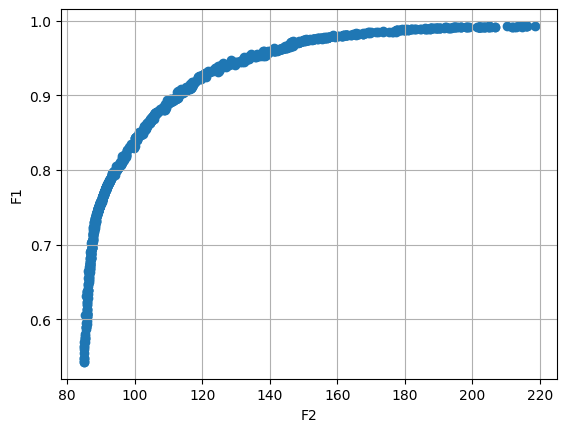

GENERATION :- 9


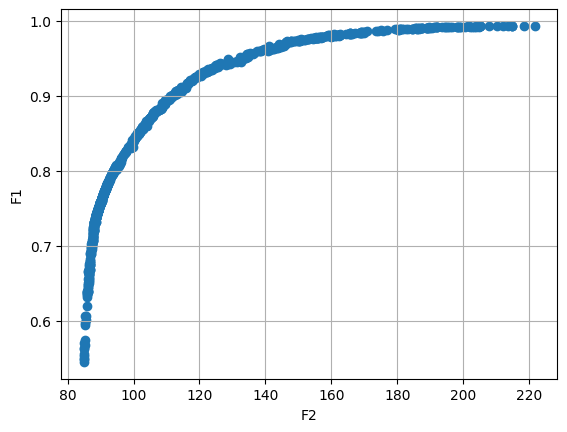

GENERATION :- 10


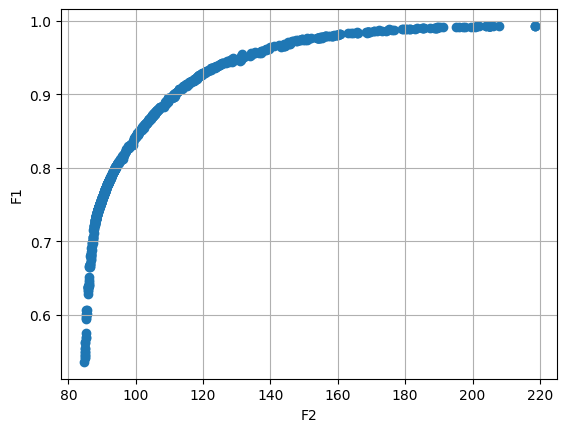

GENERATION :- 11


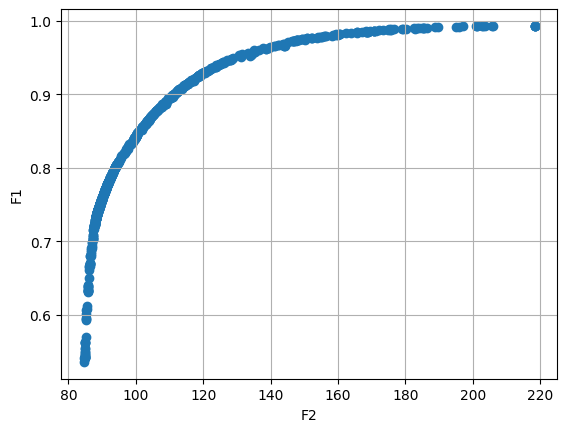

GENERATION :- 12


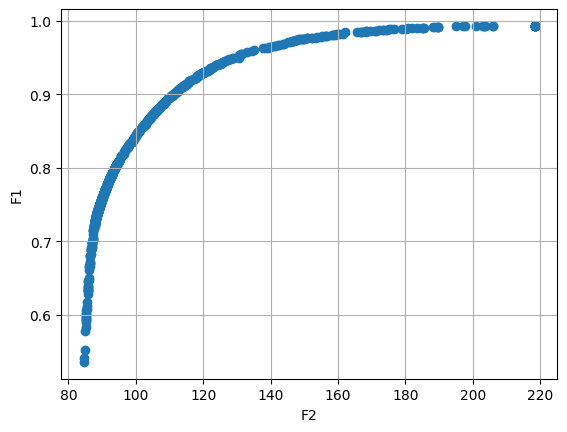

GENERATION :- 13


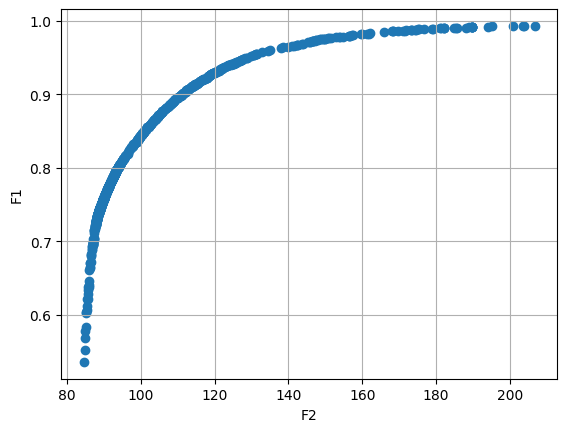

GENERATION :- 14


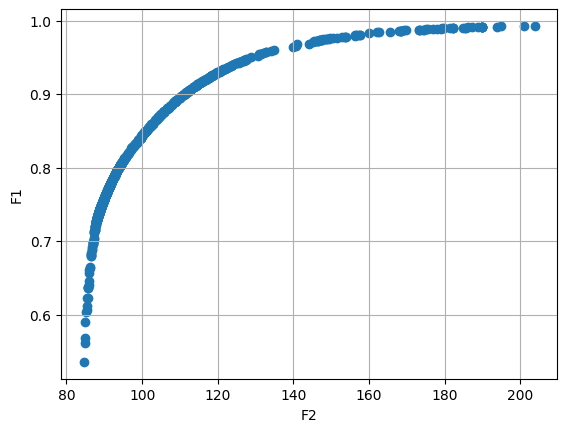

GENERATION :- 15


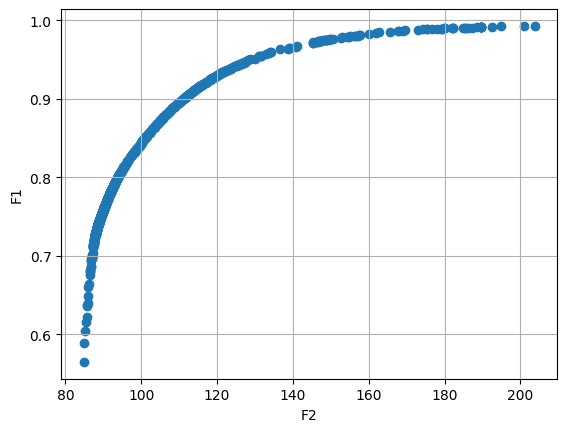

GENERATION :- 16


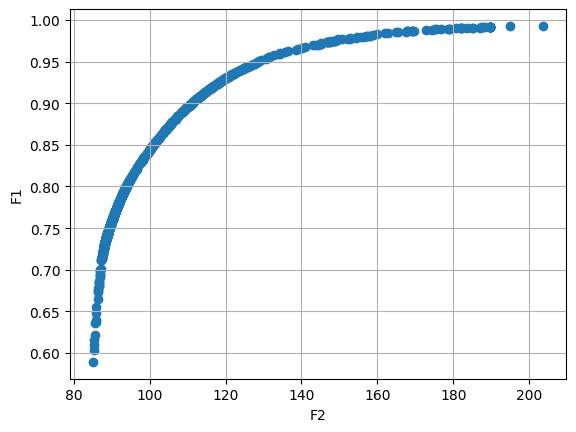

GENERATION :- 17


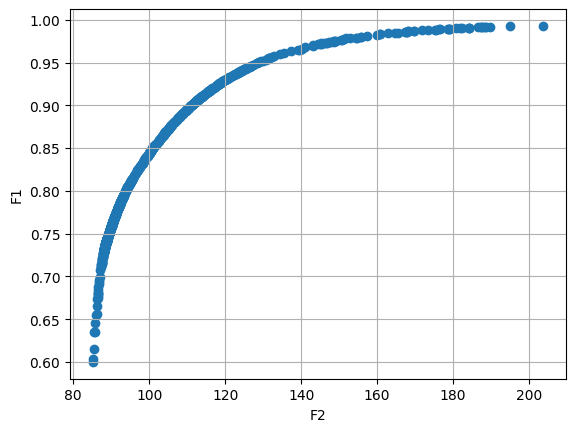

GENERATION :- 18


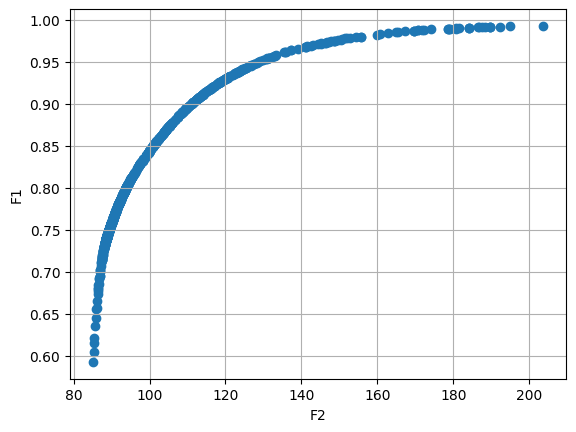

GENERATION :- 19


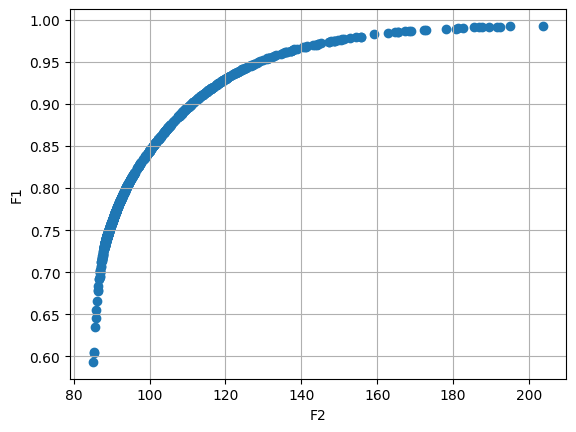

GENERATION :- 20


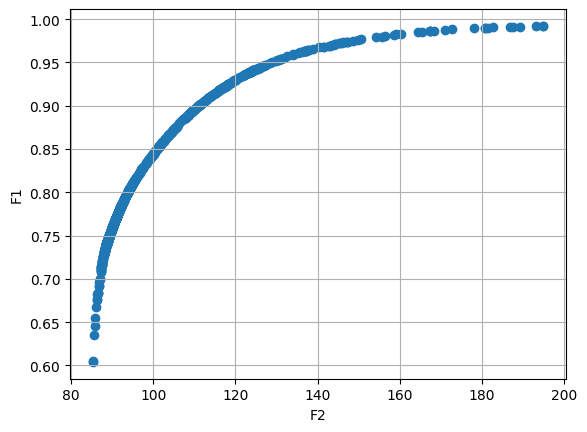

GENERATION :- 21


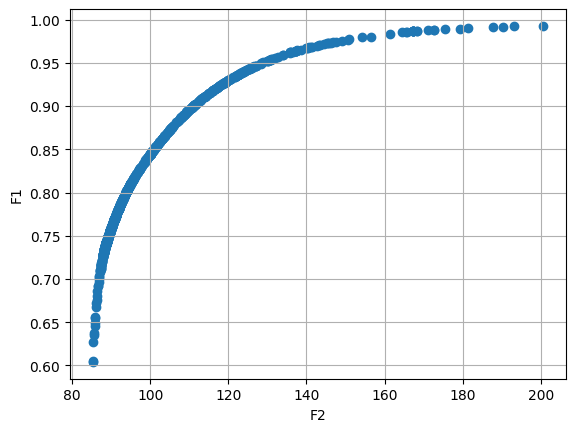

GENERATION :- 22


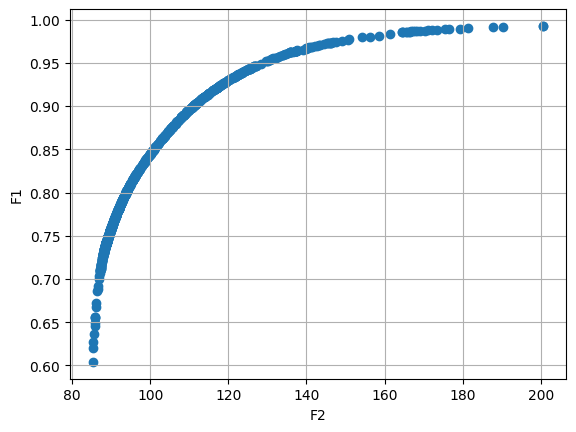

GENERATION :- 23


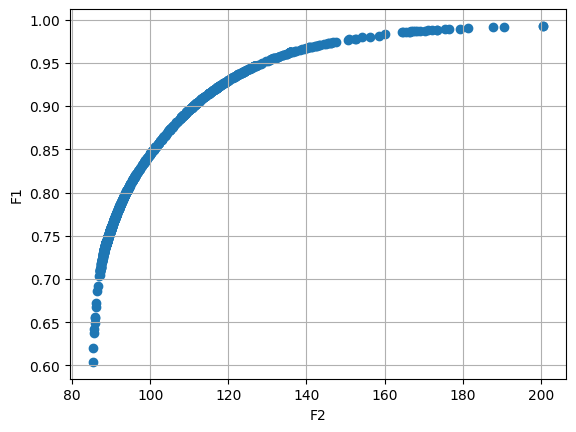

GENERATION :- 24


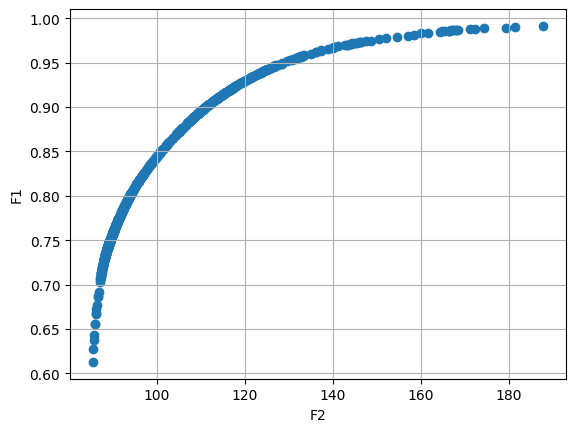

GENERATION :- 25


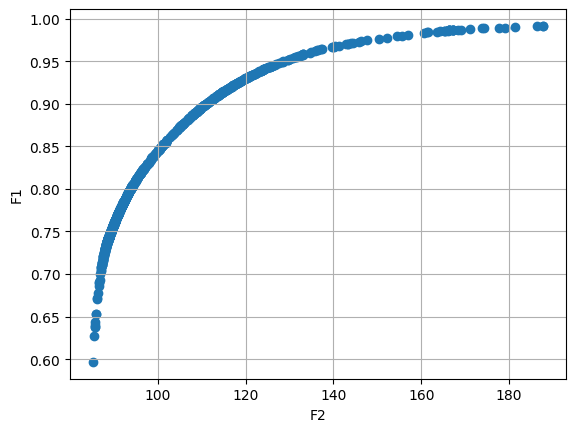

GENERATION :- 26


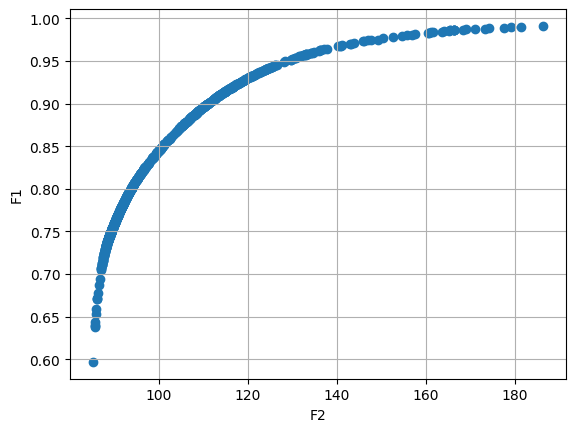

GENERATION :- 27


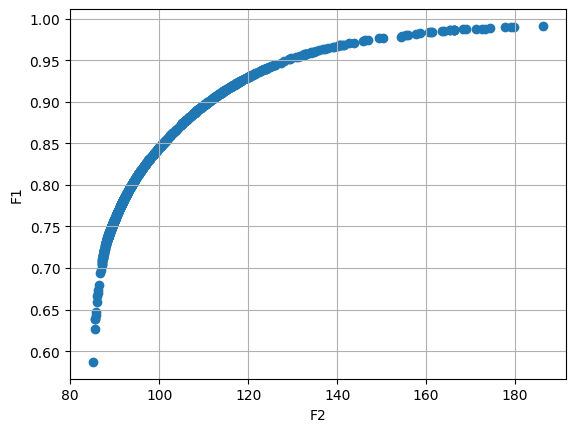

GENERATION :- 28


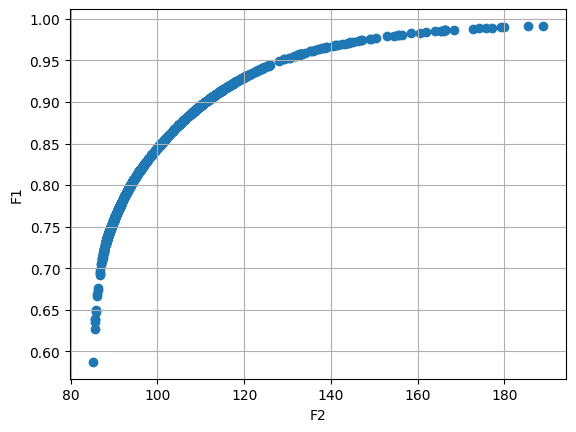

GENERATION :- 29


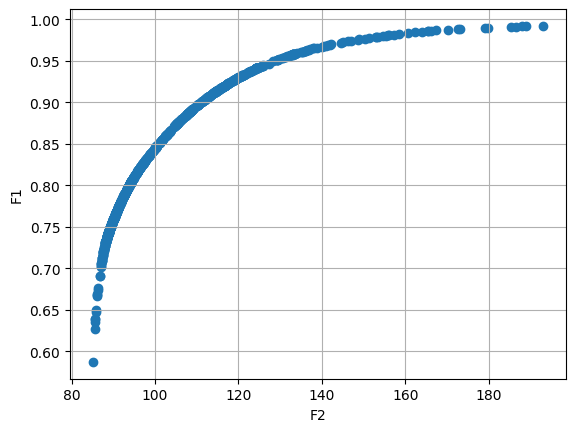

GENERATION :- 30


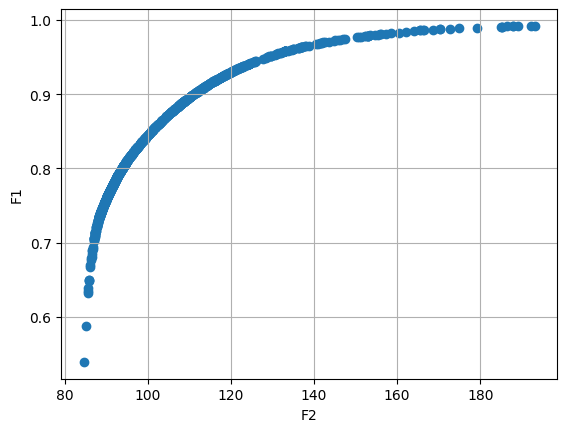

GENERATION :- 31


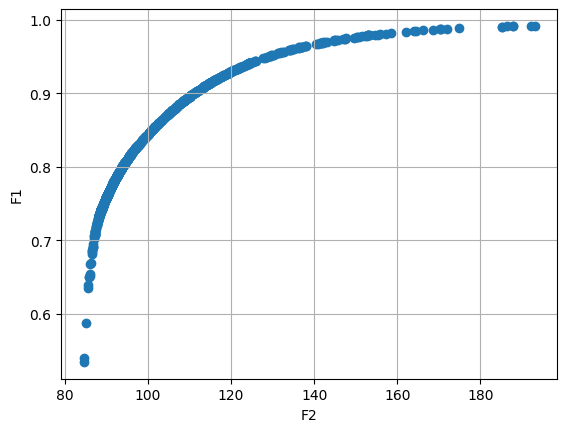

GENERATION :- 32


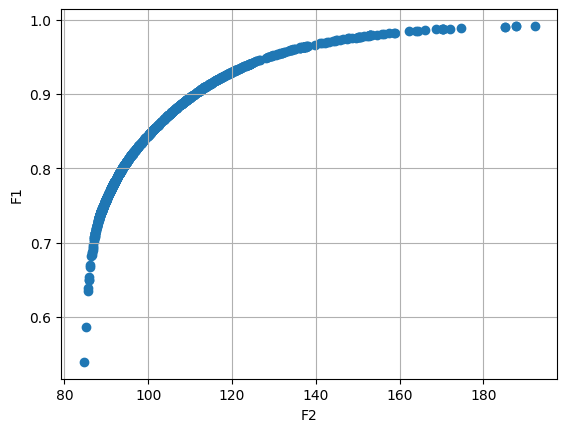

GENERATION :- 33


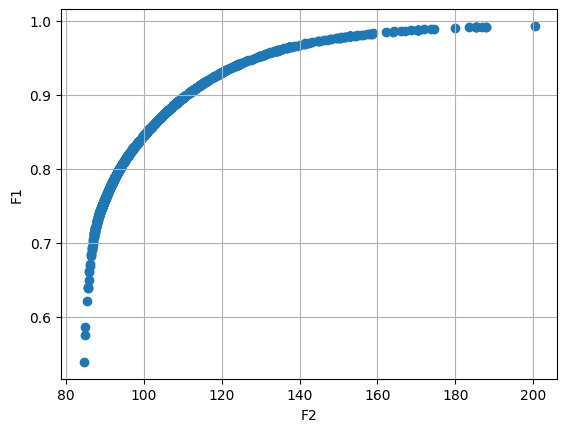

GENERATION :- 34


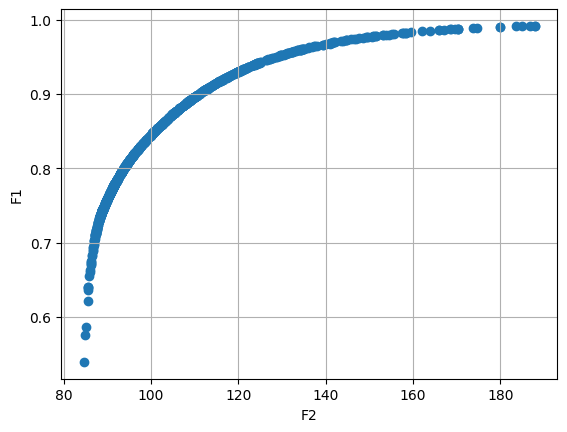

GENERATION :- 35


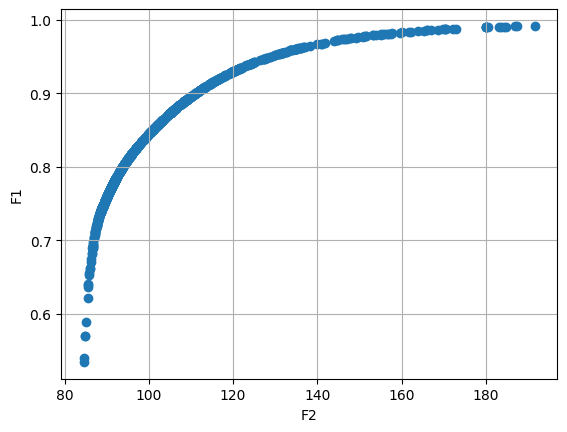

GENERATION :- 36


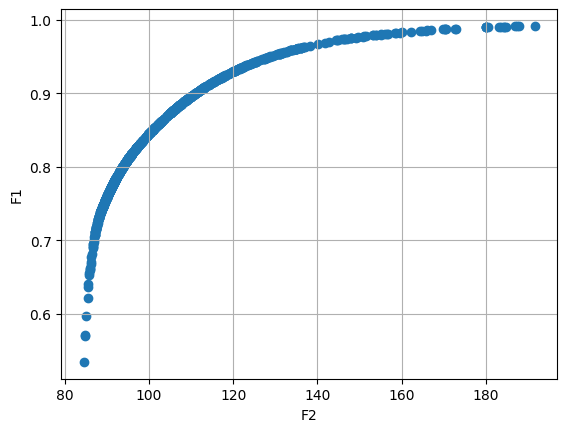

GENERATION :- 37


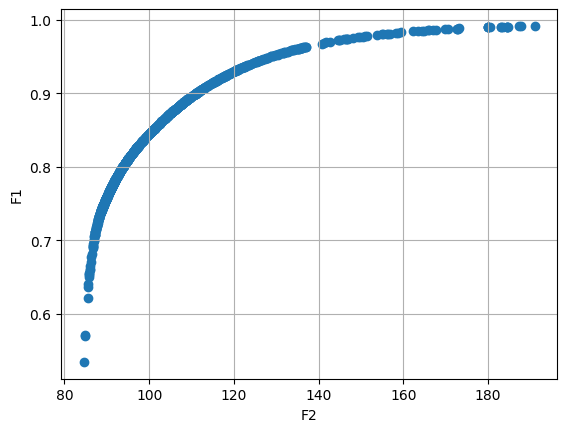

GENERATION :- 38


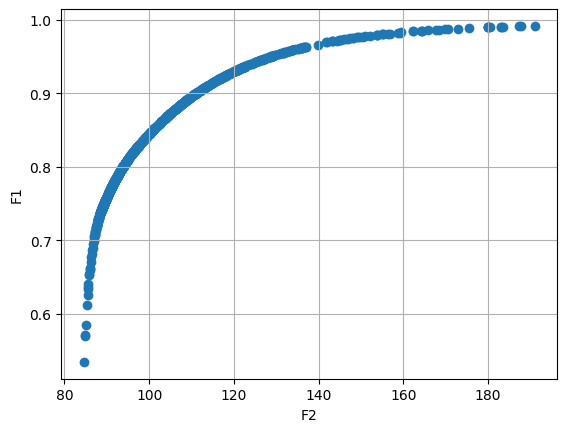

GENERATION :- 39


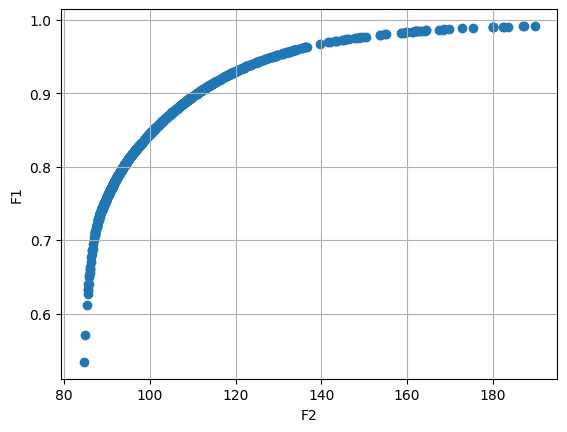

GENERATION :- 40


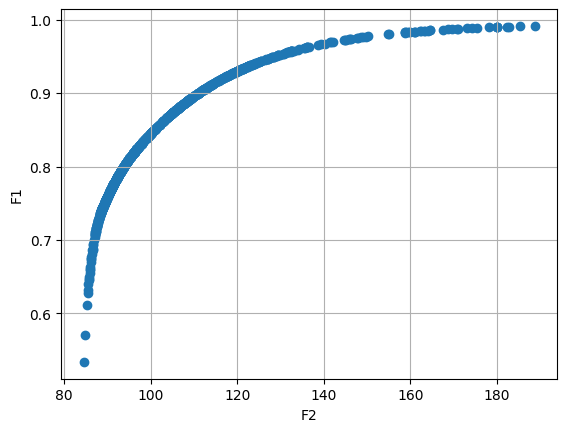

GENERATION :- 41


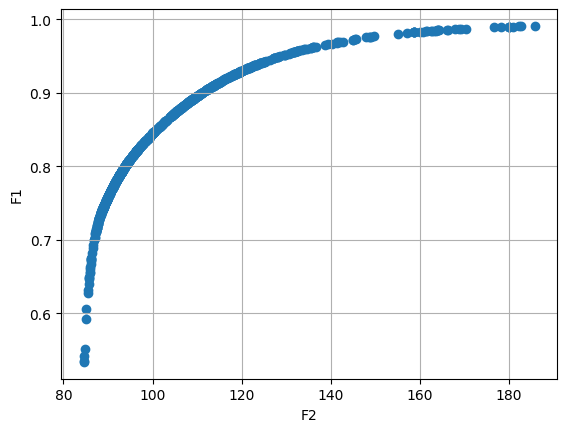

GENERATION :- 42


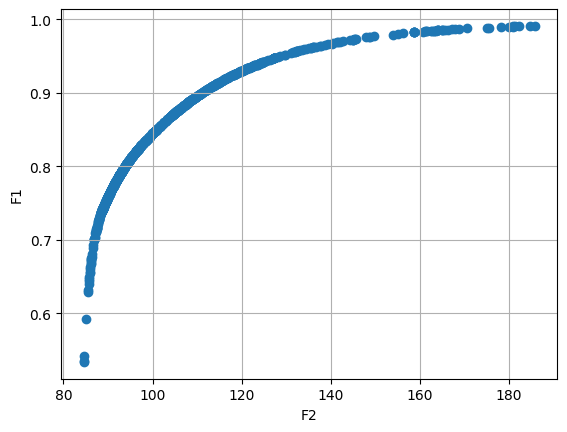

GENERATION :- 43


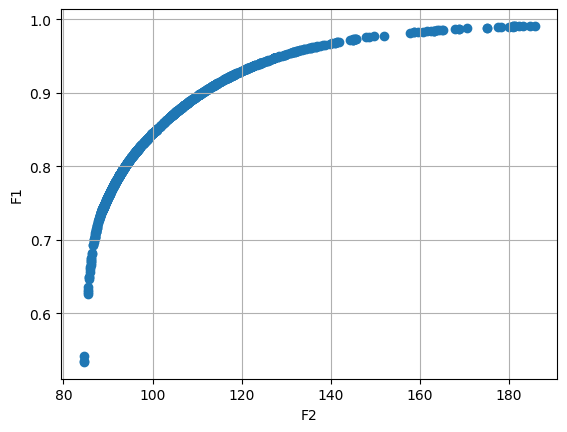

GENERATION :- 44


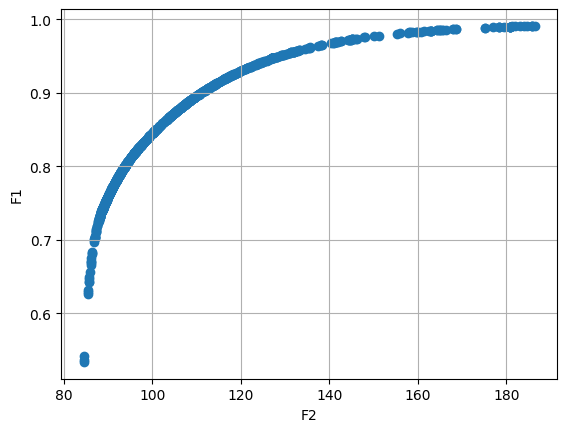

GENERATION :- 45


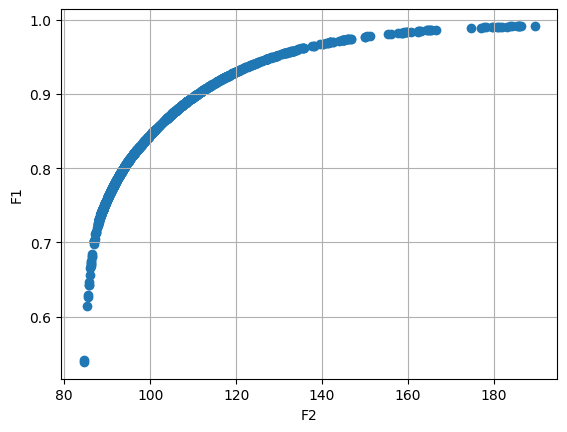

GENERATION :- 46


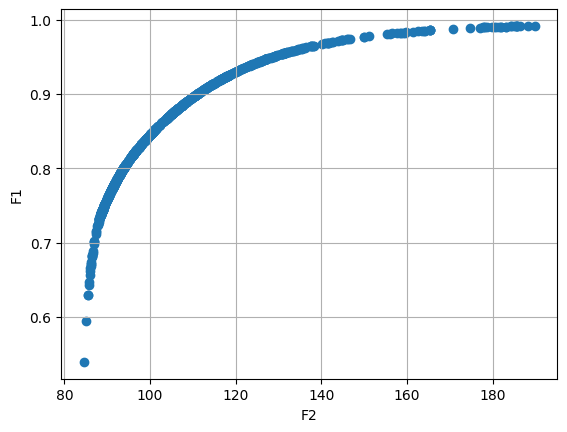

GENERATION :- 47


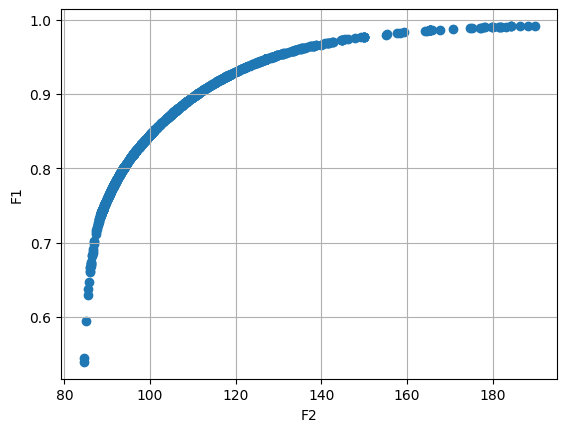

GENERATION :- 48


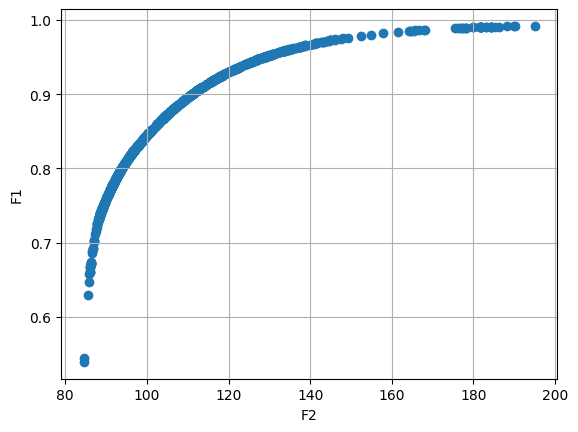

GENERATION :- 49


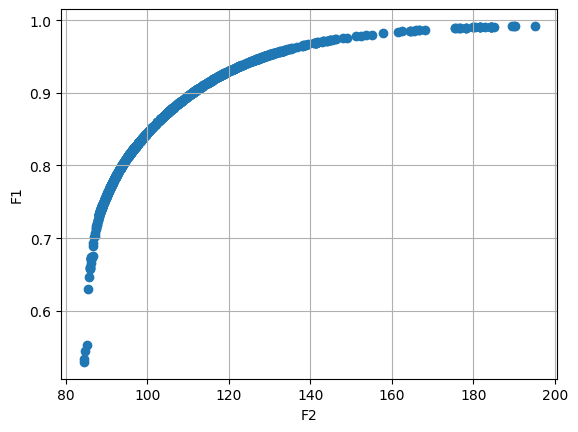

GENERATION :- 50


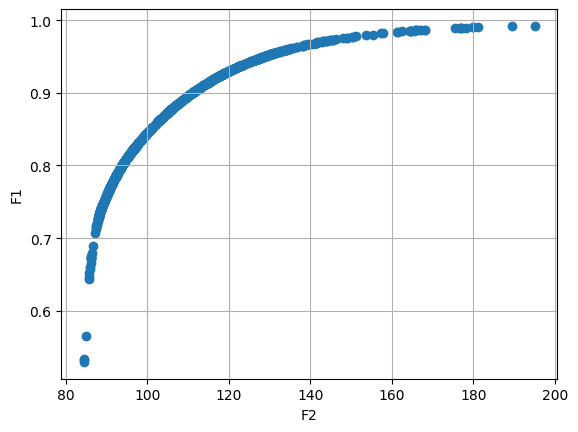

GENERATION :- 51


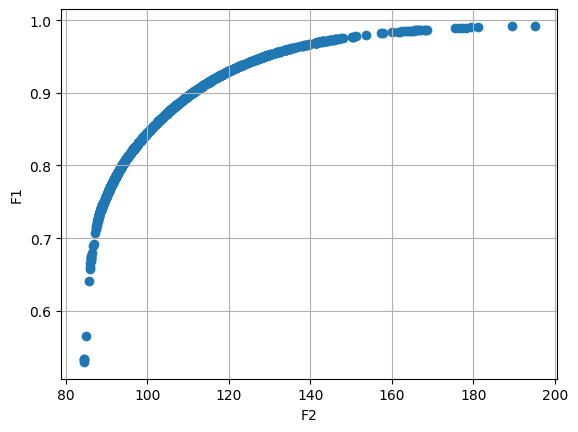

GENERATION :- 52


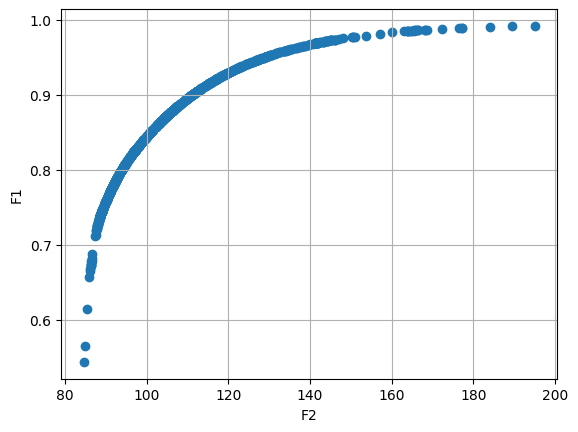

GENERATION :- 53


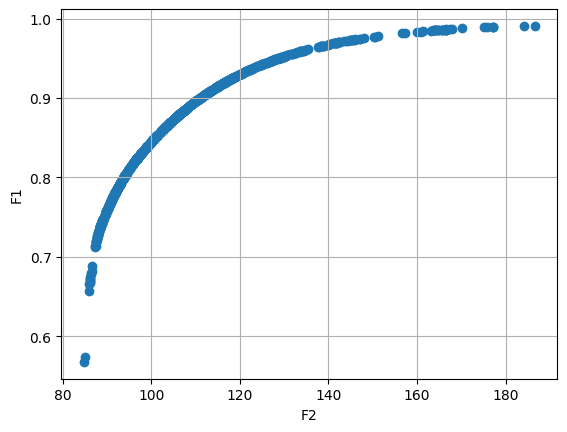

GENERATION :- 54


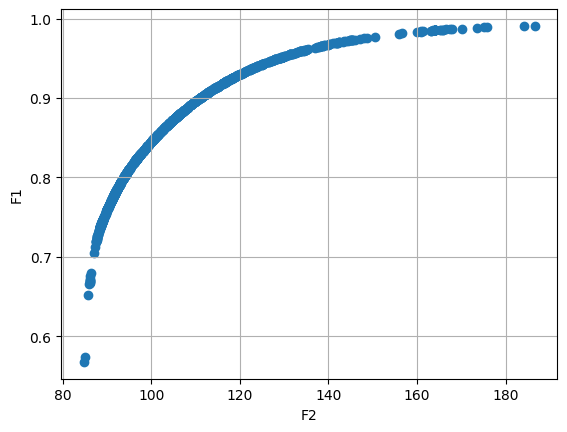

GENERATION :- 55


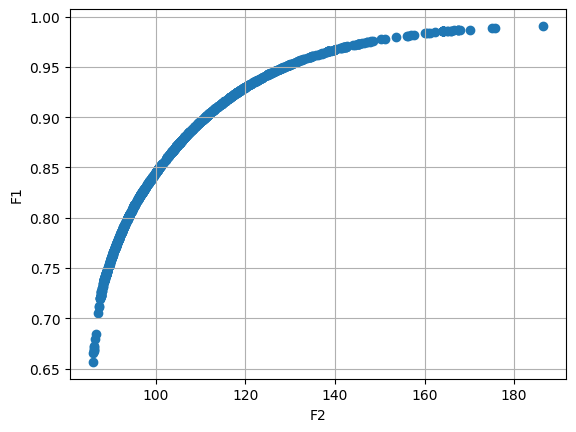

GENERATION :- 56


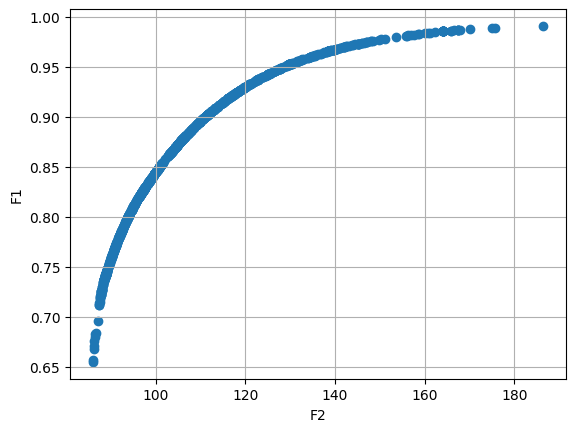

GENERATION :- 57


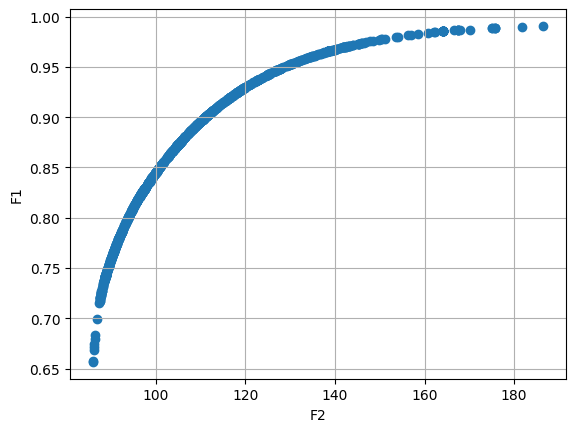

GENERATION :- 58


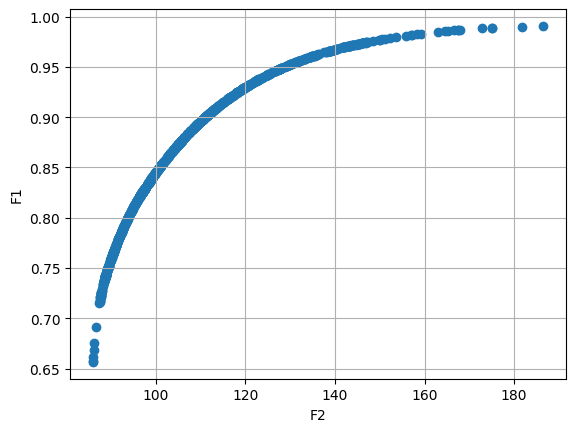

GENERATION :- 59


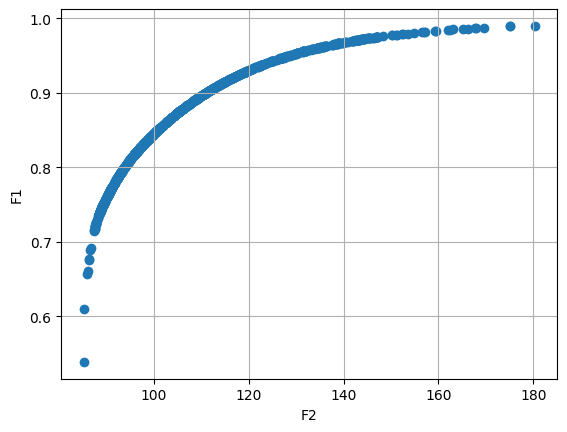

GENERATION :- 60


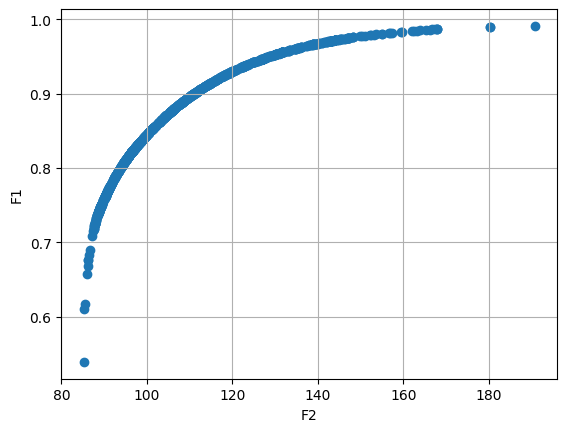

GENERATION :- 61


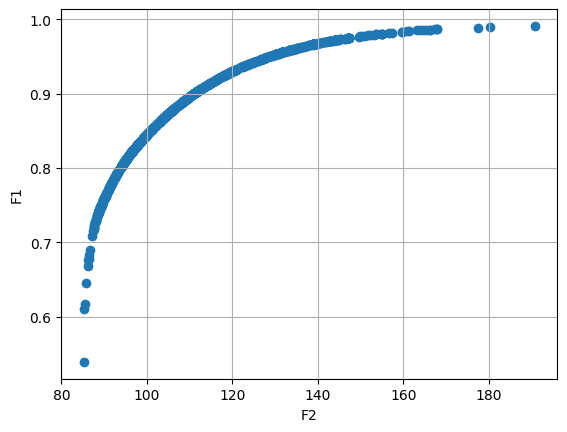

GENERATION :- 62


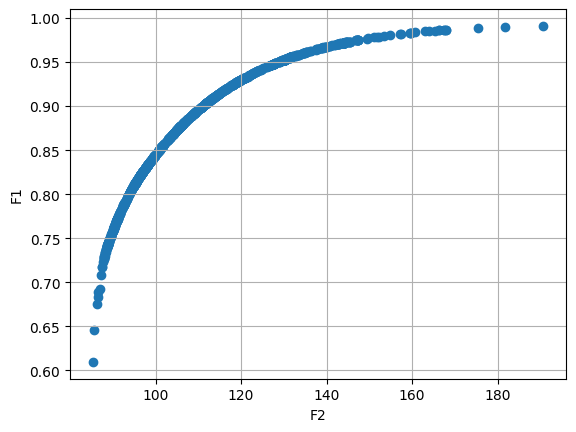

GENERATION :- 63


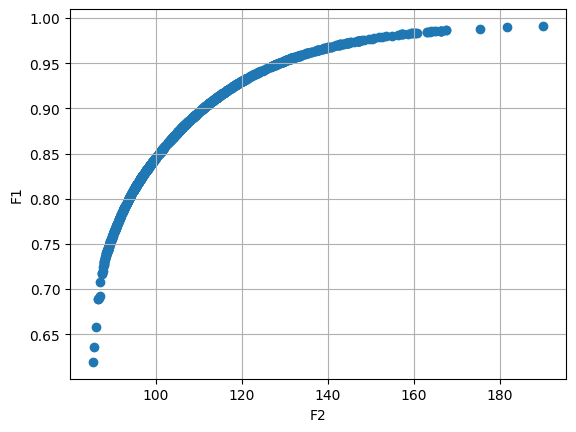

GENERATION :- 64


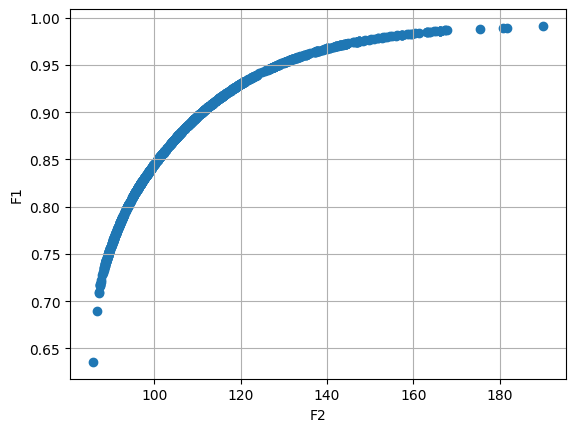

GENERATION :- 65


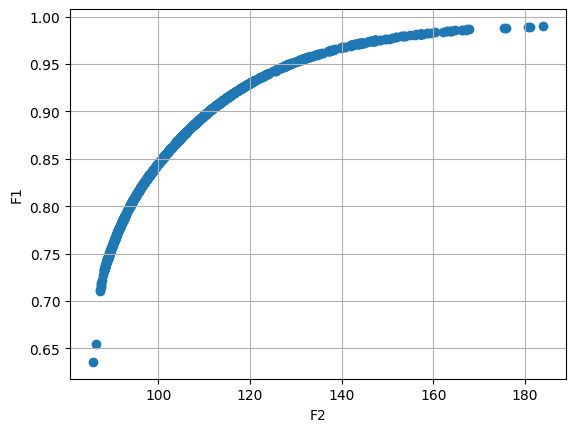

GENERATION :- 66


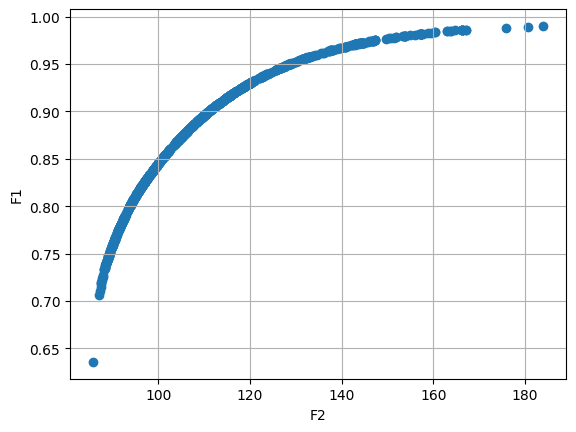

GENERATION :- 67


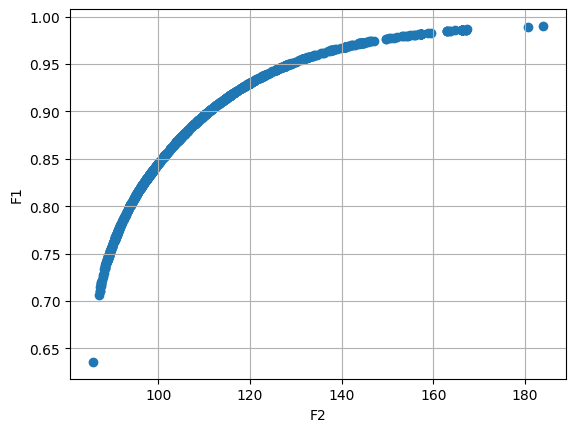

GENERATION :- 68


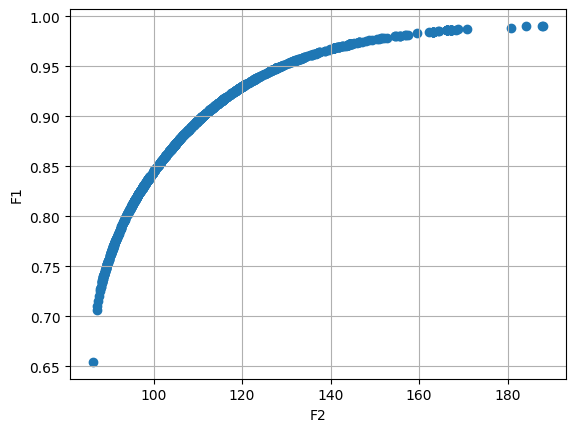

GENERATION :- 69


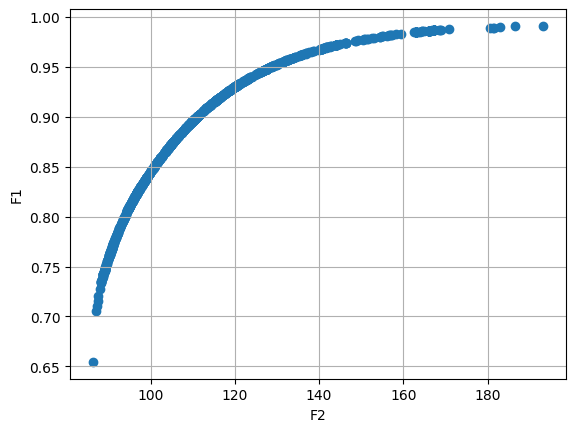

GENERATION :- 70


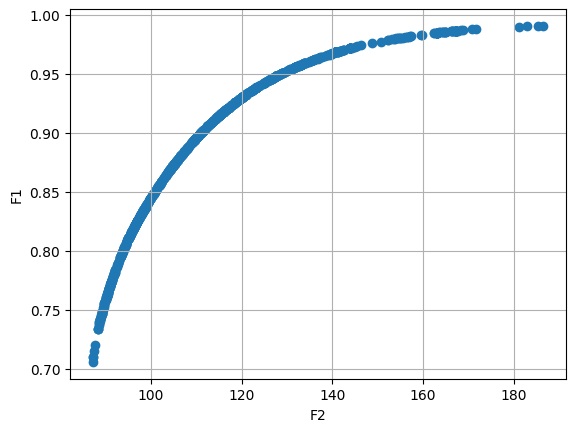

GENERATION :- 71


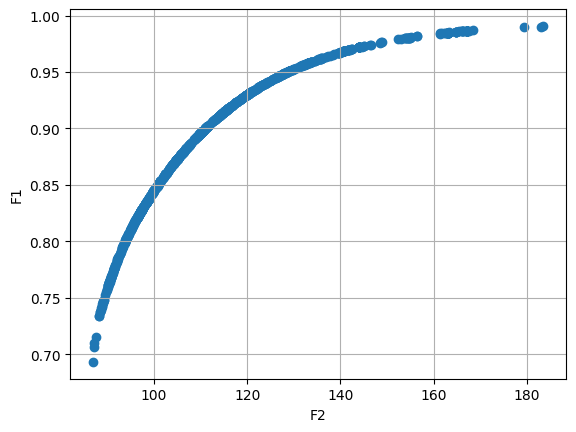

GENERATION :- 72


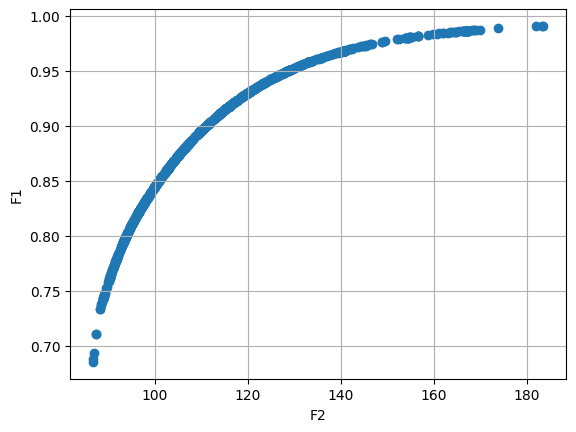

GENERATION :- 73


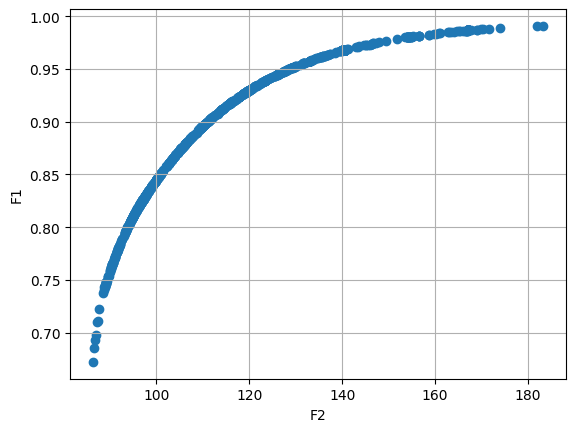

GENERATION :- 74


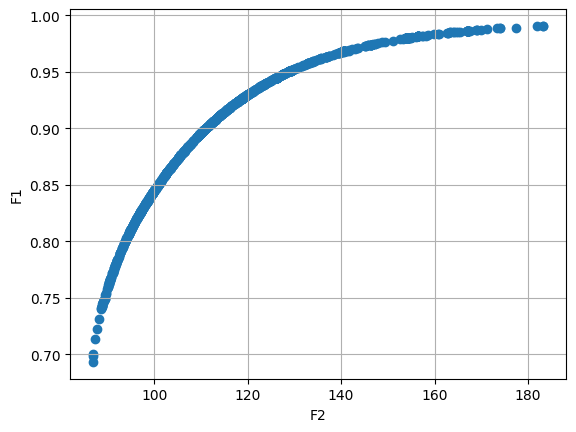

GENERATION :- 75


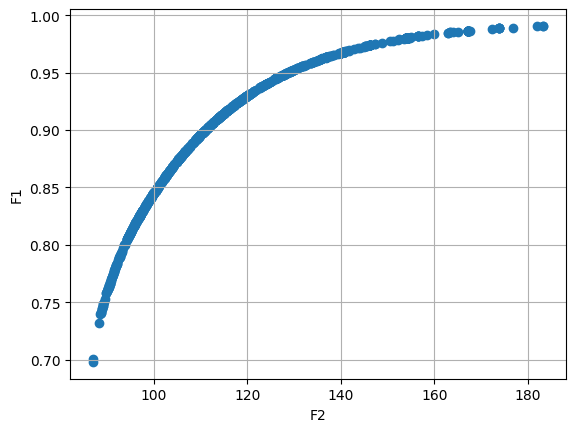

GENERATION :- 76


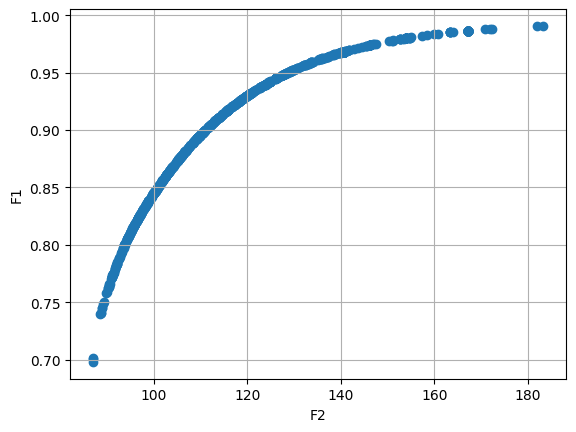

GENERATION :- 77


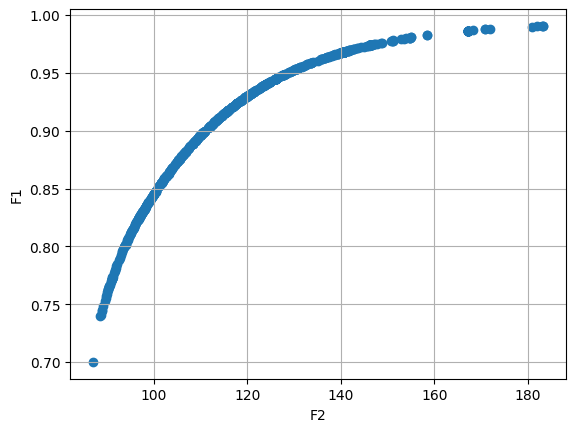

GENERATION :- 78


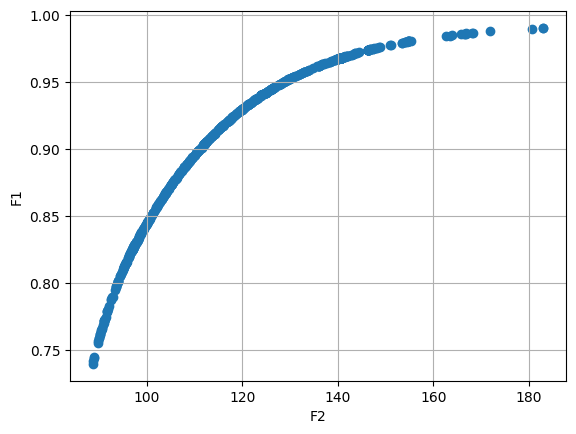

GENERATION :- 79


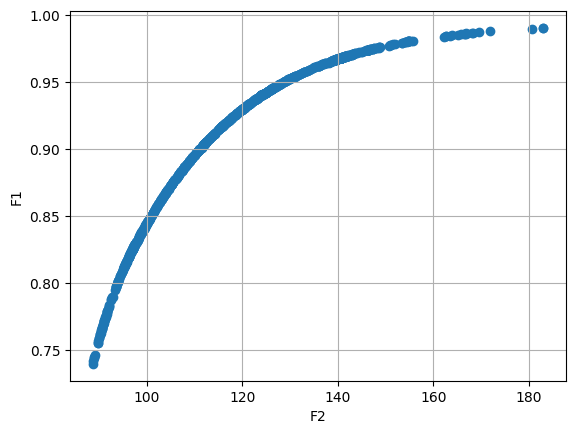

GENERATION :- 80


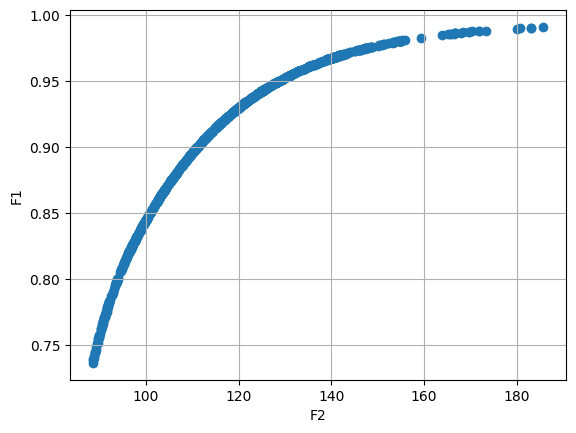

GENERATION :- 81


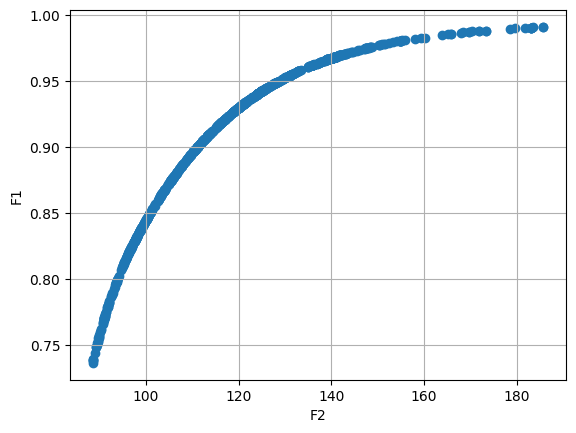

GENERATION :- 82


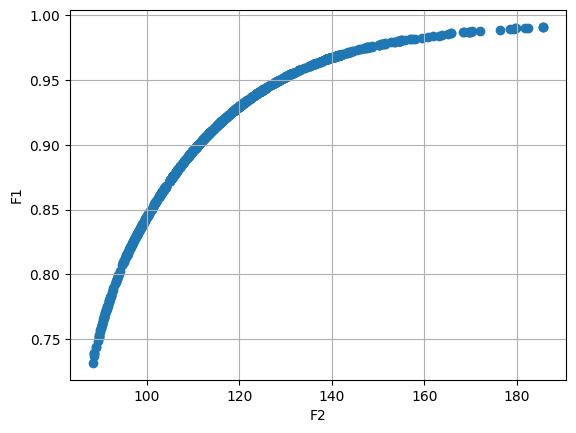

GENERATION :- 83


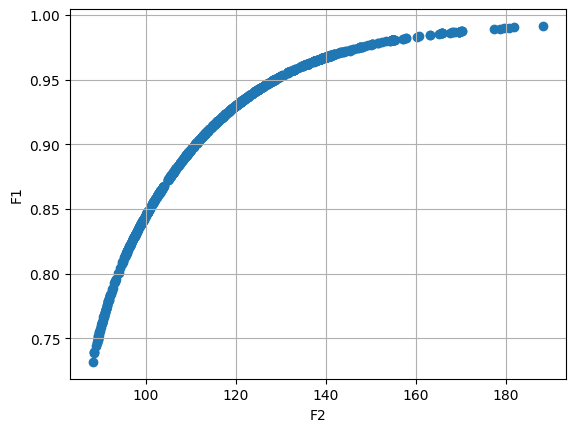

GENERATION :- 84


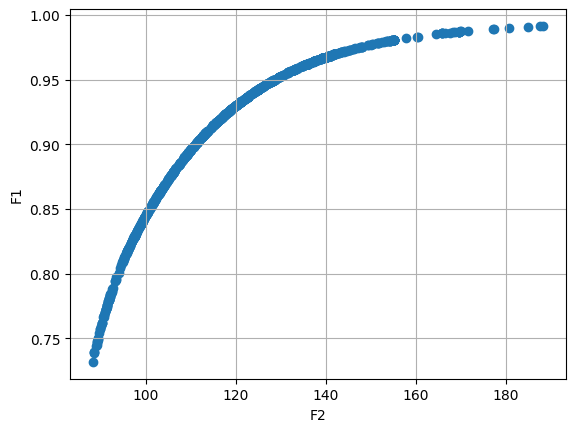

GENERATION :- 85


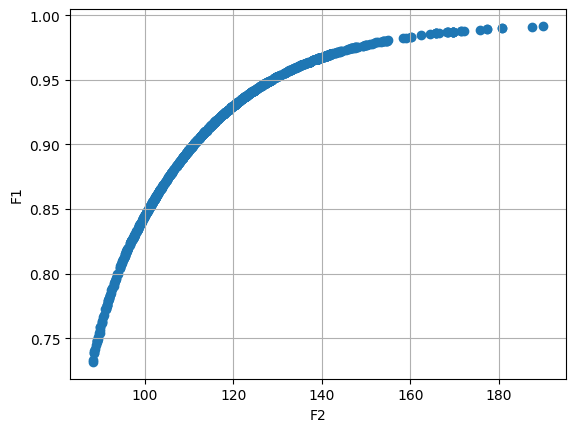

GENERATION :- 86


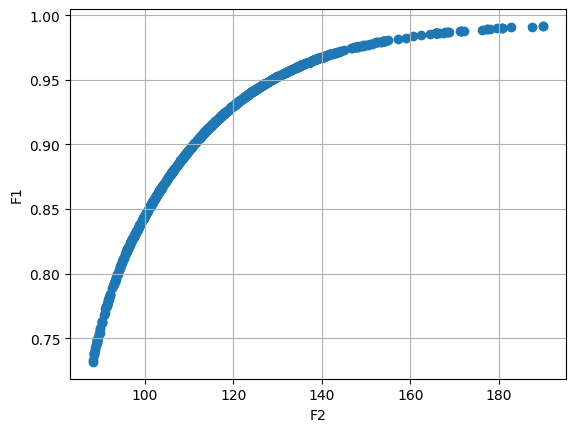

GENERATION :- 87


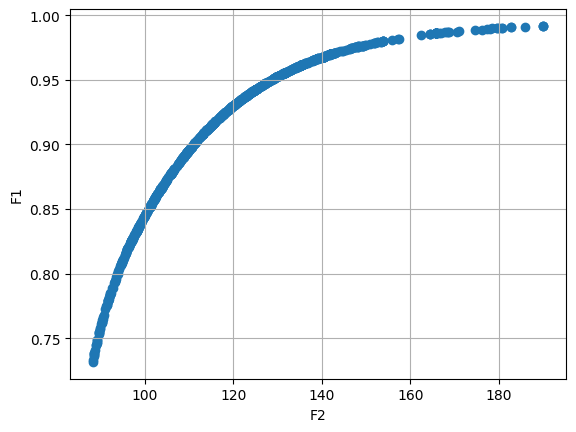

GENERATION :- 88


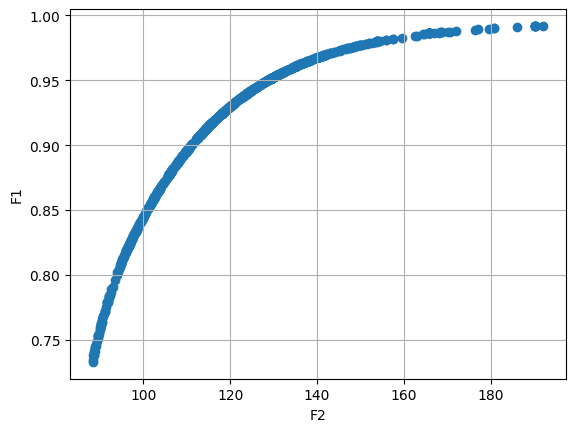

GENERATION :- 89


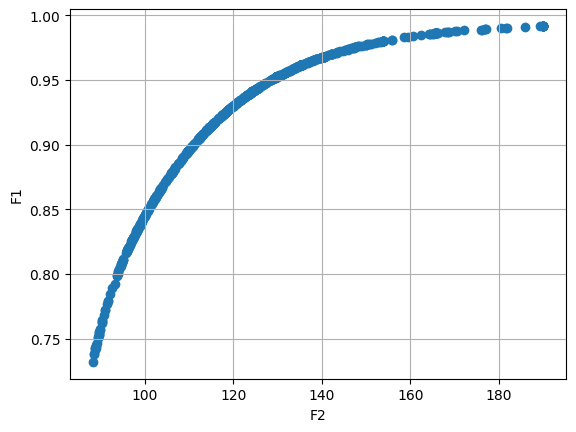

GENERATION :- 90


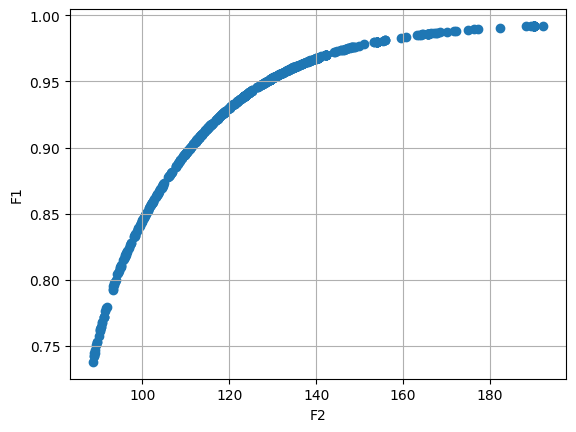

GENERATION :- 91


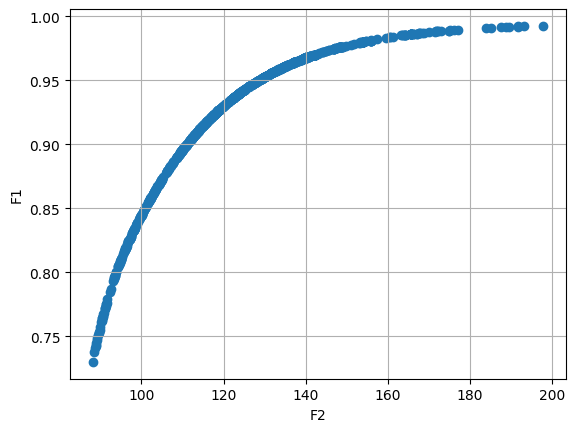

GENERATION :- 92


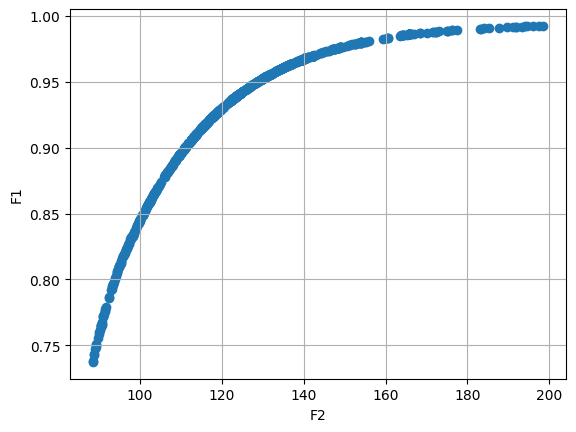

GENERATION :- 93


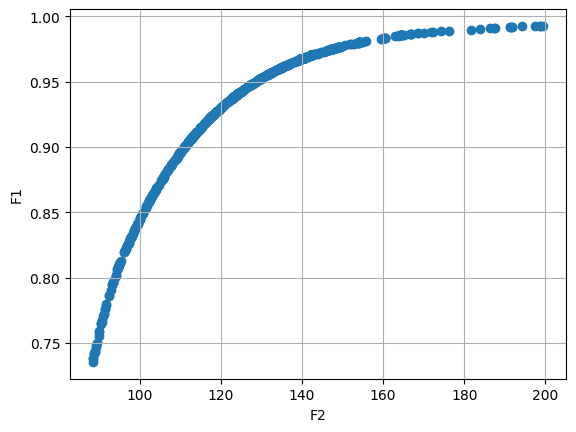

GENERATION :- 94


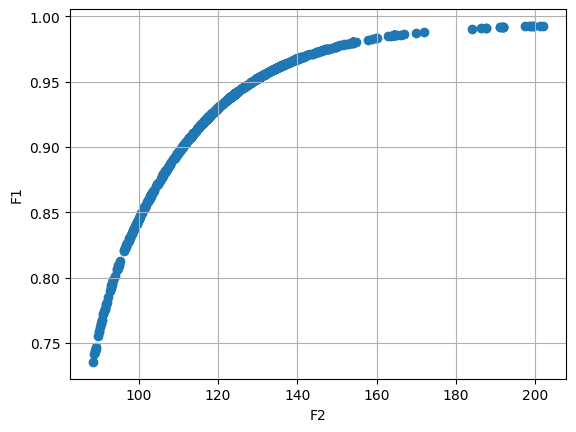

GENERATION :- 95


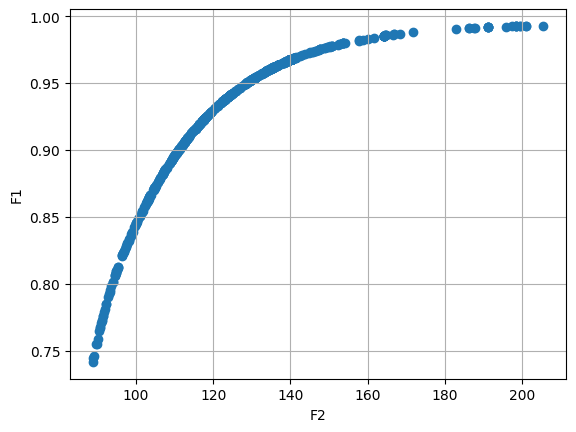

GENERATION :- 96


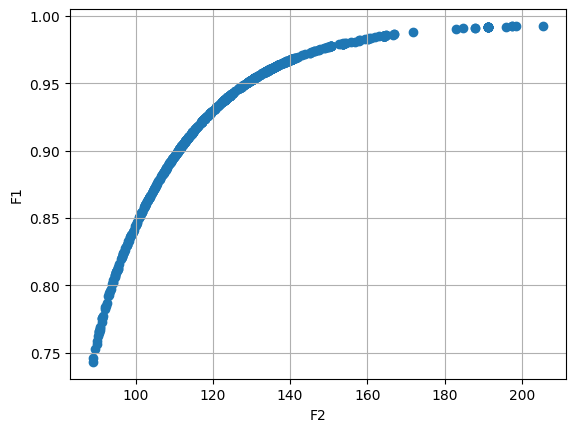

GENERATION :- 97


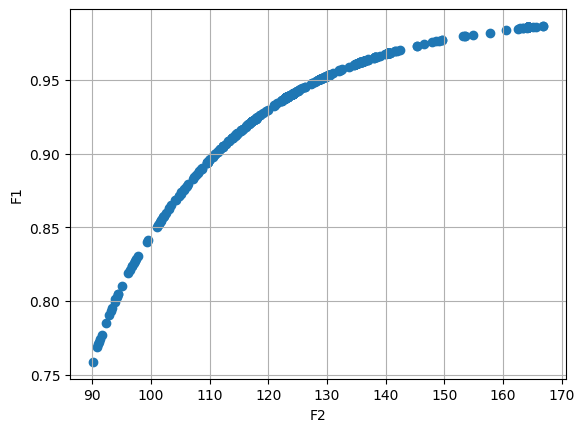

GENERATION :- 98


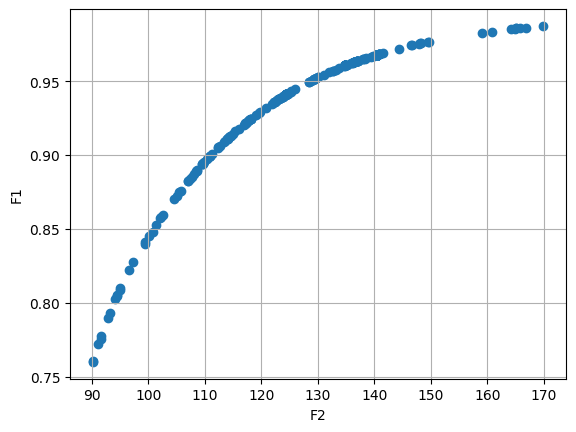

GENERATION :- 99


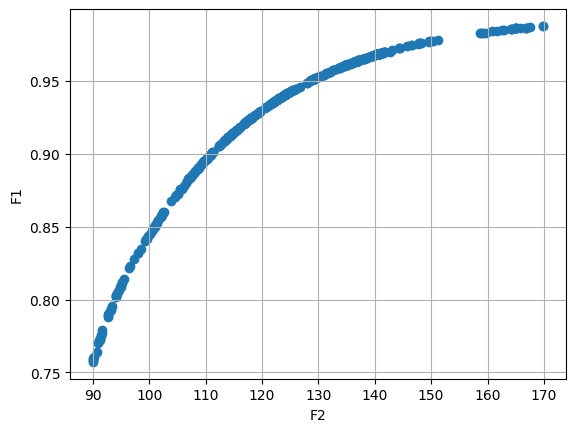

GENERATION :- 100


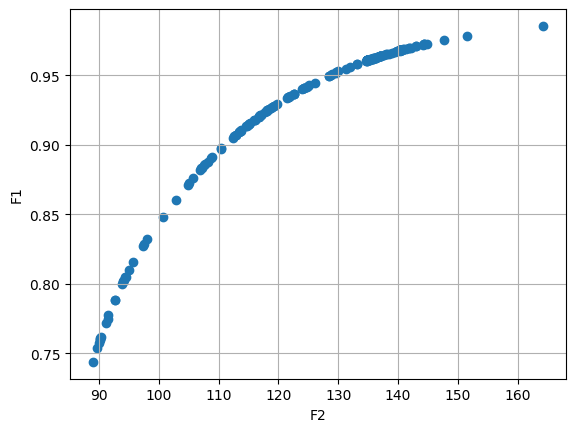

In [12]:
#Main Function

# Binary Tournament Selection + SBX Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    ##print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()